In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from util.util import get_root_dir

In [46]:
root_dir = get_root_dir()
proj_dir = root_dir + "/surrogate/plastic_train2/"
df_samples = pd.read_csv(proj_dir + "train2_data/lhs_samples.csv", index_col=0)
df_samples

,Light%,Heavy%
0,0.200000,0.800000
1,0.203015,0.796985
2,0.206030,0.793970
3,0.209045,0.790955
4,0.212060,0.787940
...,...,...
195,0.787940,0.212060
196,0.790955,0.209045
197,0.793970,0.206030
198,0.796985,0.203015


In [47]:
df_outputs = pd.read_csv(proj_dir + "train2_data/result1.csv", header=None)
df_outputs.columns = ["Reflux","Stages","Cond Duty","Reb Duty"]
df_outputs

,Reflux,Stages,Cond Duty,Reb Duty
0,5.289893,20.0,0.120100,0.028305
1,5.206231,20.0,0.120209,0.028349
2,5.124892,20.0,0.120317,0.028392
3,5.045788,20.0,0.120426,0.028435
4,4.968831,20.0,0.120534,0.028478
...,...,...,...,...
195,0.908429,20.0,0.138675,0.034184
196,0.902057,20.0,0.138733,0.034177
197,0.895719,20.0,0.138790,0.034170
198,0.889415,20.0,0.138845,0.034161


In [48]:
def extract_reflux(stage_value):
    # Filter df_samples for specified 'Stages' value and select only "Light%" column
    filtered_data_df = df_samples["Light%"]

    # Convert to numpy array
    filtered_data_np = filtered_data_df.to_numpy().reshape(-1, 1)

    # Initialize an empty list to store the concatenated data
    concatenated_data = []

    # Iterate over the filtered DataFrame
    for idx in filtered_data_df.index:
        # Extract the desired columns (0, 2, 3) from df_outputs
        output_row = df_outputs.loc[idx, df_outputs.columns[[0, 2, 3]]].to_numpy()
        # Concatenate with the row from filtered_data_np
        concatenated_row = np.concatenate((filtered_data_np[filtered_data_df.index.get_loc(idx)].reshape(1, -1), [output_row]), axis=1)
        concatenated_data.append(concatenated_row)

    # Convert the list of arrays into a single numpy array
    arr = np.vstack(concatenated_data)
    arr = arr[np.argsort(arr[:, 1])]
    return arr

s20_data = extract_reflux(20)

In [49]:
print(f"Length of data s20: {len(s20_data)}")

Length of data s20: 200


In [50]:
# Light% , RR, Cond, Reb
s20_data

array([[0.8       , 0.88314391, 0.13890001, 0.03415113],
       [0.796985  , 0.88941457, 0.13884529, 0.03416094],
       [0.79397   , 0.89571857, 0.13878952, 0.0341697 ],
       [0.790955  , 0.90205666, 0.13873272, 0.03417746],
       [0.78794   , 0.90842942, 0.1386749 , 0.03418423],
       [0.784925  , 0.91487294, 0.13861867, 0.03419258],
       [0.78191   , 0.92131198, 0.13855852, 0.03419704],
       [0.778894  , 0.92779091, 0.13849748, 0.03420065],
       [0.775879  , 0.93430588, 0.1384356 , 0.0342034 ],
       [0.772864  , 0.94085981, 0.13837287, 0.03420532],
       [0.769849  , 0.94745314, 0.13830931, 0.03420642],
       [0.766834  , 0.95408663, 0.13824492, 0.03420671],
       [0.763819  , 0.9607609 , 0.13817973, 0.0342062 ],
       [0.760804  , 0.96747661, 0.13811374, 0.03420492],
       [0.757789  , 0.97423445, 0.13804697, 0.03420286],
       [0.754774  , 0.9810351 , 0.13797944, 0.03420005],
       [0.751759  , 0.98787926, 0.13791116, 0.03419651],
       [0.748744  , 0.99476766,

## 20 stages is chosen to be the nominal condition

RR:  1.32 - 6.28 (re tested)

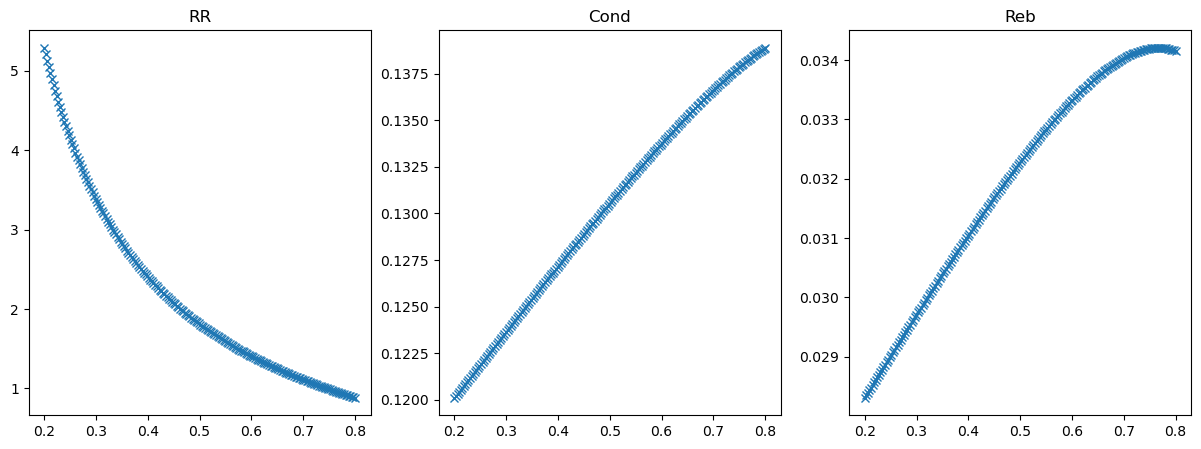

In [51]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
# First plot
axs[0].plot(s20_data.T[0], s20_data.T[1], 'x')
axs[0].set_title('RR')

# Second plot
axs[1].plot(s20_data.T[0], s20_data.T[2], 'x')
axs[1].set_title('Cond')

# Third plot
axs[2].plot(s20_data.T[0], s20_data.T[3], 'x')
axs[2].set_title('Reb')

# Display the plots
plt.show()

In [52]:
coefs1 = np.polyfit(s20_data.T[0], s20_data.T[1], 2)

# Validate
p = np.poly1d(coefs1)
RR_pred = p(s20_data.T[0])

# Calculate SSR and SST
ssr = np.sum((RR_pred - s20_data.T[1]) ** 2)
sst = np.sum((s20_data.T[1] - np.mean(s20_data.T[1])) ** 2)

# Calculate R^2
r_squared = 1 - (ssr / sst)

print("R^2:", r_squared)

coefs1

R^2: 0.9873536435853343


array([ 13.18876841, -19.34690576,   8.14721086])

In [53]:
coefs2 = np.polyfit(s20_data.T[0], s20_data.T[2], 1)

# Validate
p = np.poly1d(coefs2)
RR_pred = p(s20_data.T[0])

# Calculate SSR and SST
ssr = np.sum((RR_pred - s20_data.T[2]) ** 2)
sst = np.sum((s20_data.T[2] - np.mean(s20_data.T[2])) ** 2)

# Calculate R^2
r_squared = 1 - (ssr / sst)

print("R^2:", r_squared)

coefs2

R^2: 0.9966960839463418


array([0.03209932, 0.11419061])

In [54]:
coefs3 = np.polyfit(s20_data.T[0], s20_data.T[3], 1)

# Validate
p = np.poly1d(coefs3)
RR_pred = p(s20_data.T[0])

# Calculate SSR and SST
ssr = np.sum((RR_pred - s20_data.T[3]) ** 2)
sst = np.sum((s20_data.T[3] - np.mean(s20_data.T[3])) ** 2)

# Calculate R^2
r_squared = 1 - (ssr / sst)

print("R^2:", r_squared)

coefs3

R^2: 0.9707918275176088


array([0.01050069, 0.02670713])